<a href="https://colab.research.google.com/github/Shenghao27/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#專題實作 1:鐵達尼號存活預測

# 專題實作#1:鐵達尼號存活預測



# 環境準備 : 載入套件

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-06-27 12:44:16--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.20.102, 74.125.20.113, 74.125.20.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-27 12:44:16--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  96.0MB/s    in 0.2s    

2025-06-27 12:44:21

In [4]:
!pip install pingouin

# 載入&觀察資料

In [5]:
#輸入資料(loading df)
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

In [6]:
#觀察資料
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* 'PassengerId': 乘客編號 ,
* 'Survived': 是否存活(1:活/0:死) ,
* 'Pclass': 票務艙(1:Upper/2:Middle/3:Lower) ,
* 'Name': 姓名 ,
* 'Sex': 性別 ,
* 'Age': 年齡 ,
* 'SibSp': 在船上兄弟姊妹或配偶的人數 ,
* 'Parch': 在船上父母或子女的人數 ,
* 'Ticket': 船票號碼 ,
* 'Fare': 乘客票價 ,
* 'Cabin': 船艙號碼 ,
* 'Embarked': 登船港口

In [8]:
display(df.tail(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
Survived_Counts = df['Survived'].value_counts().reset_index()
Survived_Counts.columns = ['Survived','Counts']
Survived_Counts

,Survived,Counts
0,0,549
1,1,342


In [10]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

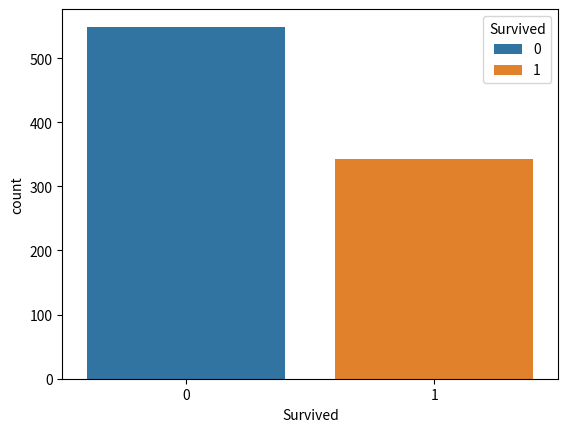

In [11]:
sns.countplot(x='Survived', hue='Survived', data=df)

# 觀察特徵與生存間的關係圖表

<Axes: xlabel='Pclass', ylabel='count'>

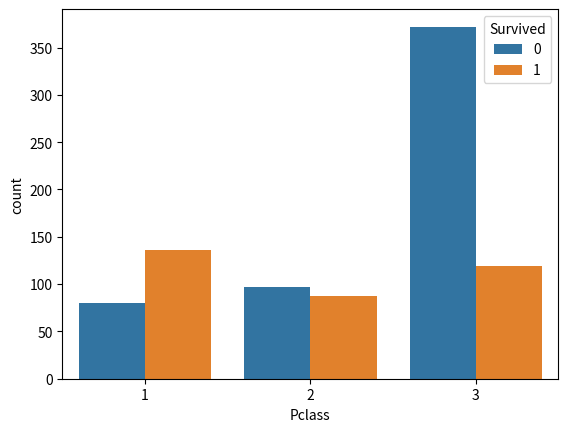

In [12]:
#存活和艙等的關係
sns.countplot(x='Pclass', hue='Survived', data=df)
#以比例來看，艙等三的存活比例低，艙等2次之，艙等1存活比例最高

<Axes: xlabel='Sex', ylabel='count'>

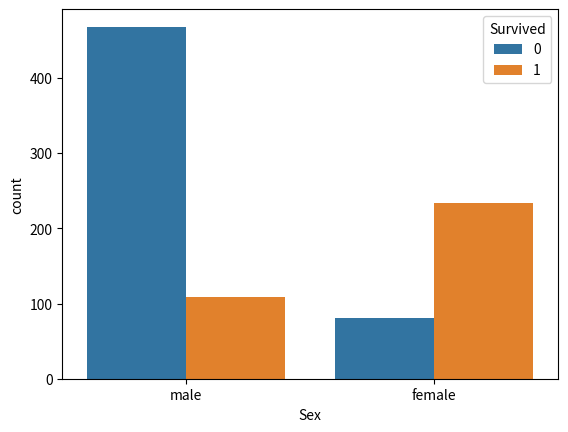

In [13]:
#存活和性別的關係
sns.countplot(x='Sex', hue='Survived', data=df)
#男性的存活比例偏低

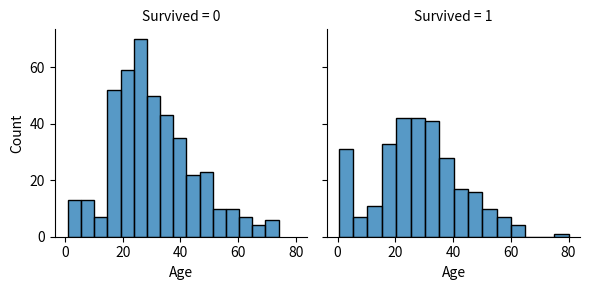

In [14]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Age', kde=False)
plt.show()
#年紀小的存活率較高。年紀大的因為人少，看不出趨勢

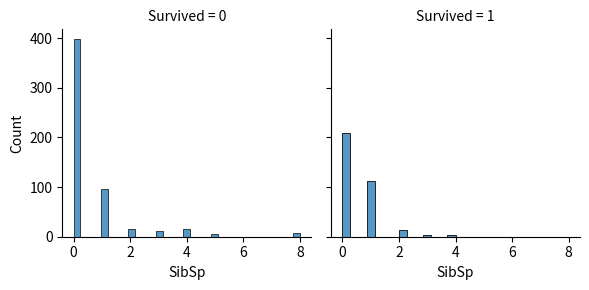

In [15]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'SibSp', kde=False)
plt.show()
#有兄弟姊妹的存活率較高

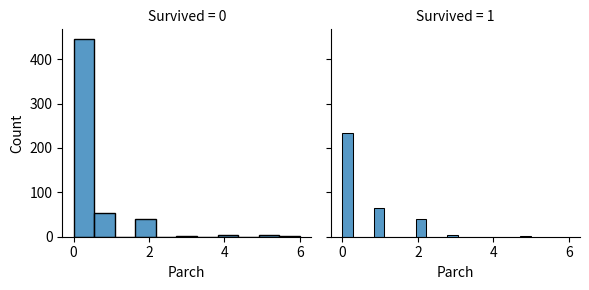

In [16]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Parch', kde=False)
plt.show()
#有父母或子女的存活率較高

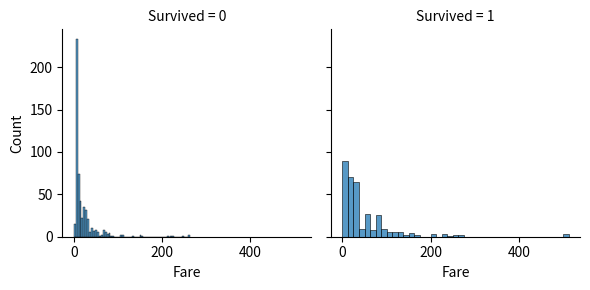

In [17]:
# 連續型用分布圖行來看
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, 'Fare', kde=False)
plt.show()
#票價低的存活比例偏低

<Axes: xlabel='Embarked', ylabel='count'>

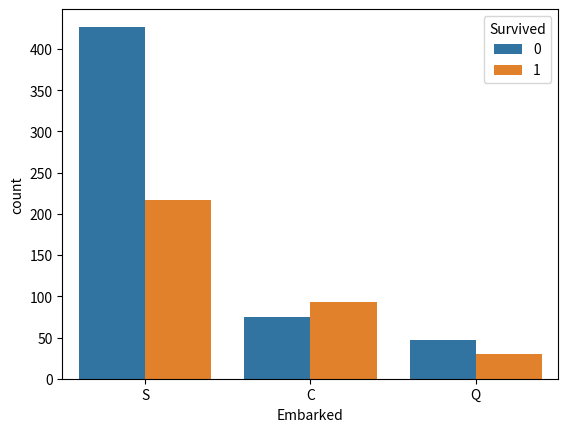

In [18]:
#存活和登船港口的關係
sns.countplot(x='Embarked', hue='Survived', data=df)
#登船港口，C的存活比例最高，Q次之，S最低
#S存活比例偏低

# 數值欄位：用 Pearson 相關係數

## pearsonr() : 只能計算一個欄位

In [19]:
from scipy.stats import pearsonr

df_valid = df[['Pclass', 'Survived']].dropna()

# corr, p = pearsonr(df_valid['Pclass'], df_valid['Survived'])
# print(f"Pclass vs Survived: corr = {corr:.3f}, p = {p:.3f}")

corr, _= pearsonr(df_valid['Pclass'], df_valid['Survived'])
print(f"Pclass vs Survived: corr = {corr:.3f}")

Pclass vs Survived: corr = -0.338


In [20]:
# 去除缺失值（dropna 對兩欄一起作用）
df_valid = df[['Age', 'Survived']].dropna()

# corr, p = pearsonr(df_valid['Age'], df_valid['Survived'])
# print(f"Age vs Survived: corr = {corr:.3f}, p = {p:.3f}")

corr, _= pearsonr(df_valid['Age'], df_valid['Survived'])
print(f"Age vs Survived: corr = {corr:.3f}")
#-0.077:非常弱的負相關（年齡越大，生存機率略低）

Age vs Survived: corr = -0.077


## corr(method='pearson') : 可多數欄位計算相關係數

===== 數值欄位 vs Survived 的相關係數 =====
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Name: Survived, dtype: float64


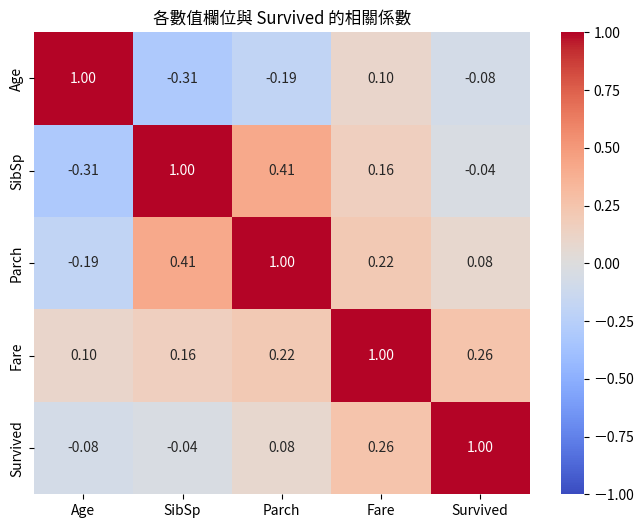

In [21]:
# Pclass dtypes: 是object,故沒有選用
# cols = ['Pclass','Age','SibSp','Parch','Fare', 'Survived']

# 選擇數值欄位
cols = ['Age','SibSp','Parch','Fare', 'Survived']
print("===== 數值欄位 vs Survived 的相關係數 =====")
print(df[cols].corr(method='pearson')['Survived'].sort_values(ascending=False))

# 畫熱力圖
corr_matrix = df[cols].corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("各數值欄位與 Survived 的相關係數")
plt.show()

# 類別欄位：比較每組平均生存率

In [22]:
for col in ['Pclass', 'Sex', 'Embarked']:
    print(df.groupby(col)['Survived'].mean())
    print()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64



## 推論性統計分析 ： 檢定「各組生存率的差異」是否達到統計顯著

檢定「各組生存率的差異」是否達到統計顯著
Eta Squared（η²）是一種衡量「變異量比例」的統計指標，用來表示自變數對因變數的影響力大小。

In [23]:
import pingouin as pg

# Sex 與 Survived 的關係
aov_pcl = pg.anova(dv='Survived', between='Pclass', data=df)
print("Pclass vs Survived ANOVA 結果：\n", aov_pcl)
print("==============================")

# Sex 與 Survived 的關係
aov_sex = pg.anova(dv='Survived', between='Sex', data=df)
print("Sex vs Survived ANOVA 結果：\n", aov_sex)
print("==============================")

# Embarked 與 Survived 的關係
aov_emb = pg.anova(dv='Survived', between='Embarked', data=df)
print("Embarked vs Survived ANOVA 結果：\n", aov_emb)

Pclass vs Survived ANOVA 結果：
    Source  ddof1  ddof2          F         p-unc       np2
0  Pclass      2    888  57.964818  2.183247e-24  0.115476
Sex vs Survived ANOVA 結果：
   Source  ddof1  ddof2           F         p-unc       np2
0    Sex      1    889  372.405724  1.406066e-69  0.295231
Embarked vs Survived ANOVA 結果：
      Source  ddof1  ddof2         F     p-unc       np2
0  Embarked      2    886  13.60527  0.000002  0.029797


In [24]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)

judgment_etaSq(aov_pcl.loc[0, 'np2'])

'Medium'

In [25]:
judgment_etaSq(aov_sex.loc[0, 'np2'])

'Large'

In [26]:
judgment_etaSq(aov_emb.loc[0, 'np2'])

'Small'

# 所有欄位一次比：用機器學習的 feature_importance_

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 欄位前處理：將類別轉成數字
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# 訓練模型
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
model = RandomForestClassifier()
model.fit(df_encoded[features].dropna(), df_encoded['Survived'].loc[df_encoded[features].dropna().index])

# 顯示重要性
importances = model.feature_importances_
# for f, i in zip(features, importances):
#     print(f"{f}: {i:.3f}")

# 排序後印出
sorted_idx = importances.argsort()[::-1]  # 從大到小排序
for idx in sorted_idx:
    print(f"{features[idx]}: {importances[idx]:.3f}")



Age: 0.282
Fare: 0.257
Sex: 0.251
Pclass: 0.097
SibSp: 0.047
Parch: 0.037
Embarked: 0.028


# Mutual Information

Sex         0.133700
Fare        0.123871
Pclass      0.063860
SibSp       0.027548
Age         0.025361
Parch       0.014664
Embarked    0.009527
dtype: float64


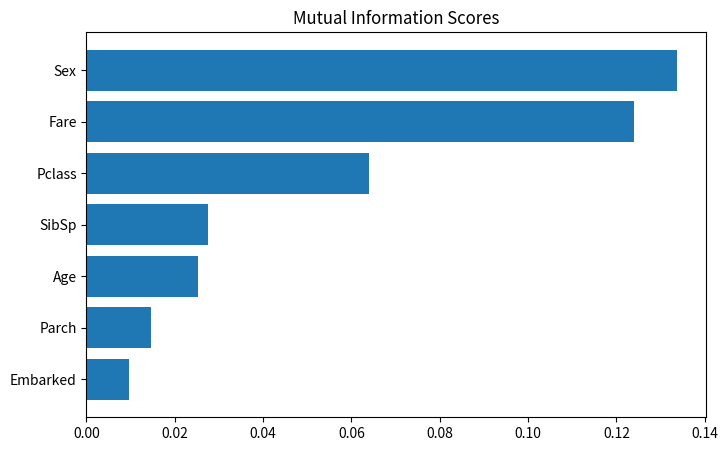

In [28]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_mi = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', "Survived"]].dropna()
X = df_mi.drop("Survived", axis=1)
y = df_mi["Survived"]

# Label encode 類別欄位
for col in X.select_dtypes("object"):
    X[col] = LabelEncoder().fit_transform(X[col])

mi = mutual_info_classif(X, y, discrete_features="auto")
mi_result = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_result)

# 繪圖
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_result)

#Sex, Fare, Pclass  :最相關欄位
#Age, Embarked, Parch :次相關欄位
#SibSp          :無相關

# 資料清理與前處理

## 檢視資料

In [29]:
#刪除'PassengerId','Name','Ticket','Cabin'
#PassengerId & Ticket:因為是序號資料，不好轉成特徵
#Name:原姓名與生存並無相關，但後續可採用Title&Age建立新特徵
#Cabin:遺失值太多了，捨去此特徵。

df_train = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1).copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## 空值資料補值

In [30]:
# 檢查缺失值
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [31]:
# 細看遺失資料的樣態
missing_index=df_train['Embarked'].isnull()
df_train[missing_index.values==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [32]:
# 空值補值
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked'] = df_train['Embarked'].fillna('None')

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## 資料型態轉換

In [34]:
le = LabelEncoder()
for col in ['Sex']:
  df_train[col] = le.fit_transform(df_train[col])

In [35]:
df_ohe_Embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked', dtype=int)
df_train = pd.concat([df_train, df_ohe_Embarked], axis=1)

In [36]:
df_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,S,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,0,0,1


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       891 non-null    object 
 8   Embarked_C     891 non-null    int64  
 9   Embarked_None  891 non-null    int64  
 10  Embarked_Q     891 non-null    int64  
 11  Embarked_S     891 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 83.7+ KB


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

train_X = df_train.drop(columns=['Survived','Embarked'])
train_y = df_train['Survived']

#使用邏輯斯迴歸模型，最多訓練 3000 次避免收斂問題。
log = LogisticRegression(random_state=0, max_iter=3000)

# 5 折交叉驗證（5-fold cross-validation），並輸出的是每一折的 準確率（accuracy）
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(f"準確率平均值:{scores.mean().round(5)}")


#[0.78212291 0.78089888 0.78651685 0.76966292 0.8258427 ]
#準確率平均值:0.78901

[0.78212291 0.78089888 0.78651685 0.76966292 0.8258427 ]
準確率平均值:0.78901


# Feature Engineering特徵工程

In [39]:
df.Name.head(5)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [40]:
#透過逗點分開，把一些資訊分開，,點後面的，就是名字，如: Braund, Mr. Owen Harris 取出  Mr. Owen Harris
df_train['Title'] = df.Name.str.split(', ', expand=True)[1]
# 然後通常 Title 的寫法，會在.之前，所以我們透過 . 分開，通常 title就是在第一個位置
df_train['Title'] = df_train.Title.str.split('.', expand=True)[0]
#就用這個兩階段的方式，把 title 取出來。
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [41]:
#分成五類，罕見稱謂,Mr、Mrs、Miss、Master、Rare
df_train['Title'] = df_train.Title.replace( ['Don','Rev','Dr','Major','Lady','Sir','Col','Capt','the Countess','Jonkheer','Dona'], 'Rare' )
df_train['Title'] = df_train.Title.replace( ['Ms','Mlle'], 'Miss' )
df_train['Title'] = df_train.Title.replace( 'Mme', 'Mrs' )
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [42]:
# 計算每個 Title 的年齡平均值及中位數
# 以前的 Master 是稱呼小孩
Age_Mean_by_title = df_train[['Title','Age']].groupby( by=['Title'] ).mean().round(3)
Age_Median_by_title = df_train[['Title','Age']].groupby( by=['Title'] ).median().round(3)
display(Age_Mean_by_title)
print('=======================')
display(Age_Median_by_title)

,Age
Title,
Master,7.087
Miss,23.374
Mr,31.754
Mrs,34.967
Rare,44.856


,Age
Title,
Master,4.000
Miss,24.000
Mr,29.699
Mrs,32.500
Rare,48.000


In [43]:
# 選用Name的Title+Age建立特徵
df_train['Age_Mean_by_title'] = df_train.groupby('Title')['Age'].transform('mean').round(3)
df_train['Age_Median_by_title'] = df_train.groupby('Title')['Age'].transform('median').round(3)

# Age的補值使用Median
df_train['Age_Median'] = df_train['Age'].fillna(df_train['Age'].median())

# 票價有偏，取自然對數(log1p)的特徵
df_train['Fare_log']=np.log1p(df_train['Fare'])

# Making Bins: 連續轉離散
df_train['FareBin_3'] = pd.qcut(df_train['Fare'], 3,labels=False)
df_train['FareBin_4'] = pd.qcut(df_train['Fare'], 4,labels=False)
df_train['FareBin_5'] = pd.qcut(df_train['Fare'], 5,labels=False)
df_train['FareBin_6'] = pd.qcut(df_train['Fare'], 6,labels=False)

In [44]:
Survival_Rate = df_train.groupby('FareBin_4')['Survived'].mean() * 100
Survival_Rate = Survival_Rate.round(3).reset_index()
Survival_Rate.columns = ['FareBin_4', 'Survival Rate(%)']
Survival_Rate
#分組後，可以觀察分的組別在存活率有沒有差異,差異越大越好

,FareBin_4,Survival Rate(%)
0,0,19.731
1,1,30.357
2,2,45.495
3,3,58.108


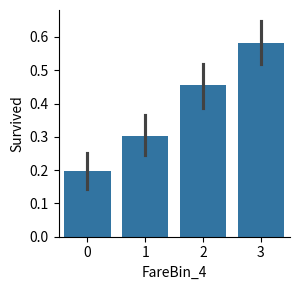

In [45]:
# 繪製長條圖
sns.catplot(
    data=df_train,
    x='FareBin_4',
    y='Survived',
    kind='bar',
    height=3,
    aspect=1
)

# plt.title('Survival Rate by FareBin_3')
# plt.ylabel('Survival Rate')
# plt.xlabel('Fare Group')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.ylim(0, 1)
# plt.tight_layout()
# plt.show()

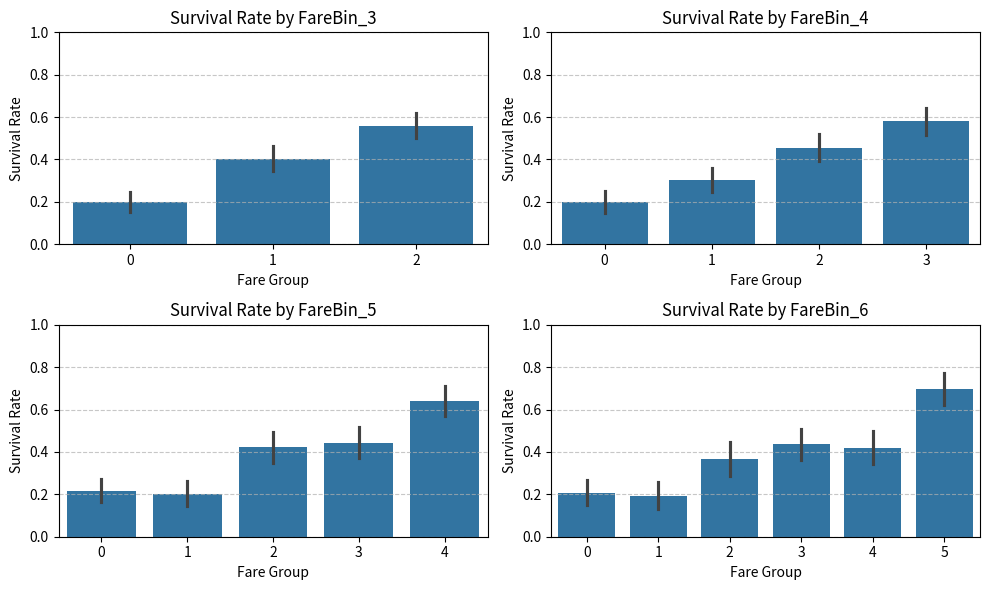

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fare_bins = ['FareBin_3', 'FareBin_4', 'FareBin_5', 'FareBin_6']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(fare_bins):
    sns.barplot(
        data=df_train,
        x=col,
        y='Survived',
        ax=axes[i]
    )
    axes[i].set_title(f"Survival Rate by {col}")
    axes[i].set_xlabel('Fare Group')
    axes[i].set_ylabel('Survival Rate')
    axes[i].set_ylim(0, 1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [47]:
# 建立家庭人數的特徵
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1

# Family_Size分群
def family_map(s):
  if s <= 1:
    return 'Alone'
  elif s <= 4:
    return 'Small'
  elif s <= 7:
    return 'Medium'
  else:
    return 'Large'
df_train['Family_Size_Grouped'] = df_train['Family_Size'].map(family_map)

# LabelEncoder Family_Size_Grouped
le = LabelEncoder()
df_train['Family_Size_Grouped_Lab'] = le.fit_transform(df_train['Family_Size_Grouped'])

# ohe Family_Size_Grouped
df_ohe_Family_Size_Grouped = pd.get_dummies(df_train['Family_Size_Grouped'], prefix='Family_Size_Grouped', dtype=int)
df_train = pd.concat([df_train, df_ohe_Family_Size_Grouped], axis=1)

In [48]:
# df_train = df_train.drop('Age_Mean_by_title', axis=1)

In [49]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_None,...,FareBin_4,FareBin_5,FareBin_6,Family_Size,Family_Size_Grouped,Family_Size_Grouped_Lab,Family_Size_Grouped_Alone,Family_Size_Grouped_Large,Family_Size_Grouped_Medium,Family_Size_Grouped_Small
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,2,Small,3,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,...,3,4,5,2,Small,3,0,0,0,1
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,1,1,1,1,Alone,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,3,4,5,2,Small,3,0,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,1,1,1,1,Alone,0,1,0,0,0


# 特徵選取

In [50]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Embarked_C', 'Embarked_None', 'Embarked_Q', 'Embarked_S',
       'Title', 'Age_Mean_by_title', 'Age_Median_by_title', 'Age_Median',
       'Fare_log', 'FareBin_3', 'FareBin_4', 'FareBin_5', 'FareBin_6',
       'Family_Size', 'Family_Size_Grouped', 'Family_Size_Grouped_Lab',
       'Family_Size_Grouped_Alone', 'Family_Size_Grouped_Large',
       'Family_Size_Grouped_Medium', 'Family_Size_Grouped_Small'],
      dtype='object')

Age_Median_by_title           0.177105
Age_Mean_by_title             0.169856
Sex                           0.150401
Fare_log                      0.135290
Fare                          0.130938
FareBin_6                     0.072172
Pclass                        0.060307
SibSp                         0.049889
Age_Median                    0.043341
Family_Size_Grouped_Lab       0.042279
Family_Size                   0.035170
FareBin_3                     0.033643
Family_Size_Grouped_Small     0.033043
Embarked_C                    0.028441
FareBin_4                     0.028414
FareBin_5                     0.026522
Age                           0.020781
Embarked_S                    0.017653
Parch                         0.008044
Family_Size_Grouped_Alone     0.005744
Embarked_None                 0.000000
Embarked_Q                    0.000000
Family_Size_Grouped_Medium    0.000000
Family_Size_Grouped_Large     0.000000
dtype: float64


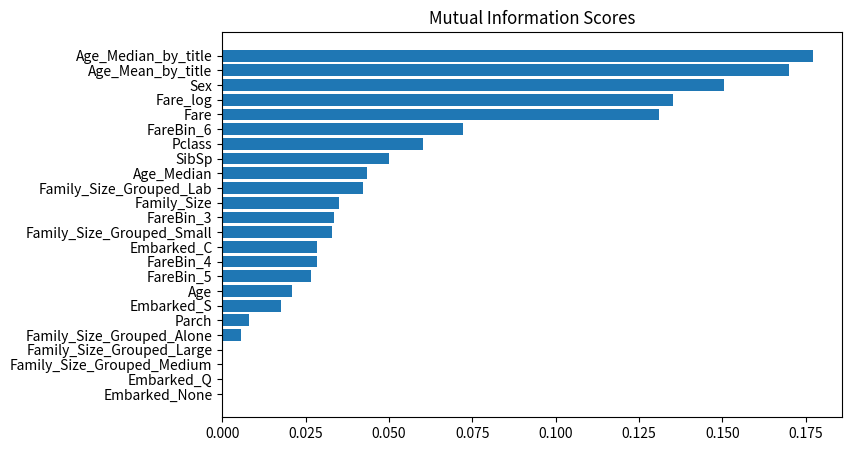

In [51]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_None', 'Embarked_Q', 'Embarked_S',
       'Age_Mean_by_title', 'Age_Median_by_title', 'Age_Median', 'Fare_log',
       'FareBin_3', 'FareBin_4', 'FareBin_5', 'FareBin_6', 'Family_Size',
       'Family_Size_Grouped_Alone','Family_Size_Grouped_Large',
       'Family_Size_Grouped_Medium','Family_Size_Grouped_Small','Family_Size_Grouped_Lab']

df_mi = df_train[cols].dropna()
X = df_mi.drop("Survived", axis=1)
y = df_mi["Survived"]

# Label encode 類別欄位
for col in X.select_dtypes("object"):
    X[col] = LabelEncoder().fit_transform(X[col])

mi = mutual_info_classif(X, y, discrete_features="auto")
mi_result = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_result)

# 繪圖
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_result)

In [52]:
# corr_matrix = df_train[cols].corr(method='pearson')

print("===== 各欄位 vs Survived 的相關係數 =====")
print(df_train[cols].corr(method='pearson')['Survived'].sort_values(ascending=False))

===== 各欄位 vs Survived 的相關係數 =====
Survived                      1.000000
Fare_log                      0.329862
FareBin_6                     0.325626
FareBin_5                     0.317783
FareBin_3                     0.305799
FareBin_4                     0.299357
Family_Size_Grouped_Small     0.279855
Fare                          0.257307
Family_Size_Grouped_Lab       0.244408
Embarked_C                    0.168240
Parch                         0.081629
Embarked_None                 0.060095
Family_Size                   0.016639
Embarked_Q                    0.003650
SibSp                        -0.035322
Age                          -0.069809
Age_Median                   -0.069809
Family_Size_Grouped_Medium   -0.089167
Family_Size_Grouped_Large    -0.096040
Age_Median_by_title          -0.140298
Embarked_S                   -0.155660
Age_Mean_by_title            -0.184576
Family_Size_Grouped_Alone    -0.203367
Pclass                       -0.338481
Sex                          -

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cols_1 = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_None', 'Embarked_Q', 'Embarked_S',
       'Age_Mean_by_title', 'Age_Median_by_title', 'Fare_log',
       'FareBin_3', 'FareBin_4', 'FareBin_5', 'FareBin_6', 'Family_Size',
       'Family_Size_Grouped_Alone','Family_Size_Grouped_Large',
       'Family_Size_Grouped_Medium','Family_Size_Grouped_Small']


train_X = df_train[cols_1]
train_y = df_train['Survived']

#使用邏輯斯迴歸模型，最多訓練 3000 次避免收斂問題。
log = LogisticRegression(random_state=0, max_iter=3000)

# 5 折交叉驗證（5-fold cross-validation），並輸出的是每一折的 準確率（accuracy）
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(f"準確率平均值:{scores.mean().round(5)}")

#Age使用的Mean跟Median的補值後的準確率平均值一樣
#[0.79888268 0.80337079 0.80337079 0.80898876 0.84269663]
#準確率平均值:0.81146

[0.79888268 0.80337079 0.80337079 0.80898876 0.84269663]
準確率平均值:0.81146


In [54]:
cols_2 = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_None', 'Embarked_Q', 'Embarked_S',
       'Age_Mean_by_title', 'Age_Median_by_title', 'Fare_log',
       'FareBin_3', 'FareBin_4', 'FareBin_5', 'FareBin_6', 'Family_Size',
       'Family_Size_Grouped_Lab']


train_X = df_train[cols_2]
train_y = df_train['Survived']

#使用邏輯斯迴歸模型，最多訓練 3000 次避免收斂問題。
log = LogisticRegression(random_state=0, max_iter=3000)

# 5 折交叉驗證（5-fold cross-validation），並輸出的是每一折的 準確率（accuracy）
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(f"準確率平均值:{scores.mean().round(5)}")

#使用Family_Size_Grouped_Lab特徵後的準確率平均值變低
#[0.7877095  0.79775281 0.80337079 0.80337079 0.83707865]
#準確率平均值:0.80586

[0.7877095  0.79775281 0.80337079 0.80337079 0.83707865]
準確率平均值:0.80586


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cols_3 = ['Pclass', 'Sex', 'Age', 'Fare',
       'Embarked_C', 'Embarked_S',
       'Age_Median_by_title', 'Fare_log',
       'FareBin_4',
       'Family_Size_Grouped_Large',
       'Family_Size_Grouped_Medium','Family_Size_Grouped_Small']


train_X = df_train[cols_3]
train_y = df_train['Survived']

#使用邏輯斯迴歸模型，最多訓練 3000 次避免收斂問題。
log = LogisticRegression(random_state=0, max_iter=3000)

# 5 折交叉驗證（5-fold cross-validation），並輸出的是每一折的 準確率（accuracy）
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(f"準確率平均值:{scores.mean().round(5)}")

#根據特徵相關係數，篩選比較有用的特徵結果
#[0.82122905 0.79775281 0.80898876 0.81460674 0.83707865]
#準確率平均值:0.81593

[0.82122905 0.79775281 0.80898876 0.81460674 0.83707865]
準確率平均值:0.81593


In [56]:
# print('train_X的特徵:')
# print(train_X.dtypes)
